In [3]:
import pandas as pd

# Replace with your actual file path
file_path = '/Users/rakeshpatel/Downloads/Data Analytics Project/amazon_delivery.csv'

# Load data
df = pd.read_csv(file_path)

# Show first 5 rows
print("First 5 rows:")
print(df.head())

# Show data info (columns, types, non-null counts)
print("\nData Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check missing values per column
print("\nMissing values:")
print(df.isnull().sum())
# Example: after cleaning steps
df.head()




First 5 rows:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    Hig

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


Key observations:
Dataset size: 43,739 rows — great for robust analysis.

Columns: 16 columns including order info, agent details, locations, delivery time, weather, traffic, and category.

Delivery Time: Given as minutes (likely actual delivery duration). No promised delivery date though — so we’ll analyze delivery duration and factors affecting it.

Missing values:

Agent_Rating missing in 54 rows (very small, can be imputed or dropped)

Weather missing in 91 rows (small, same options)

Data types: Mostly good; Order_Date/Time are strings, so we’ll convert to datetime for time analysis.

What we’ll do next (Step 2: Data Cleaning & Preparation)
Convert Order_Date, Order_Time, and Pickup_Time to datetime.

Check & handle missing values in Agent_Rating and Weather.

Possibly create new columns for analysis, like:

Order_DateTime combining Order_Date + Order_Time

Pickup_DateTime combining Order_Date + Pickup_Time

Analyze delivery time distribution and outliers.

Prepare data for SQL queries and Python analysis.

In [4]:
# Please provide the code with the error so I can help you solve it.

In [10]:
import pandas as pd
import numpy as np

# Load dataset (adjust path)
file_path = '/Users/rakeshpatel/Downloads/Data Analytics Project/amazon_delivery.csv'
df = pd.read_csv(file_path)

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Fill missing Order_Time and Pickup_Time with '00:00:00'
df['Order_Time'] = df['Order_Time'].fillna('00:00:00').str.strip()
df['Pickup_Time'] = df['Pickup_Time'].fillna('00:00:00').str.strip()

# Combine Order_Date and Order_Time into Order_DateTime (handle errors)
df['Order_DateTime'] = pd.to_datetime(df['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Order_Time'], errors='coerce')

# Combine Order_Date and Pickup_Time into Pickup_DateTime (handle errors)
df['Pickup_DateTime'] = pd.to_datetime(df['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Pickup_Time'], errors='coerce')

# Drop rows where datetime conversion failed
df = df.dropna(subset=['Order_DateTime', 'Pickup_DateTime']).copy()

# Fill missing Agent_Rating and Weather with median and 'Unknown' respectively
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())
df['Weather'] = df['Weather'].fillna('Unknown')

# Flag long deliveries over 180 minutes
df['Long_Delivery_Flag'] = np.where(df['Delivery_Time'] > 180, 1, 0)

# Save cleaned data to a folder where you have write permission
df.to_csv('/Users/rakeshpatel/Downloads/delivery_data_cleaned.csv', index=False)

print("Data cleaning complete. Sample data:")
print(df.head())


Data cleaning complete. Sample data:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471 2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237 2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400 2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494 2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982 2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0  

Average Delivery Time: 124.91 minutes


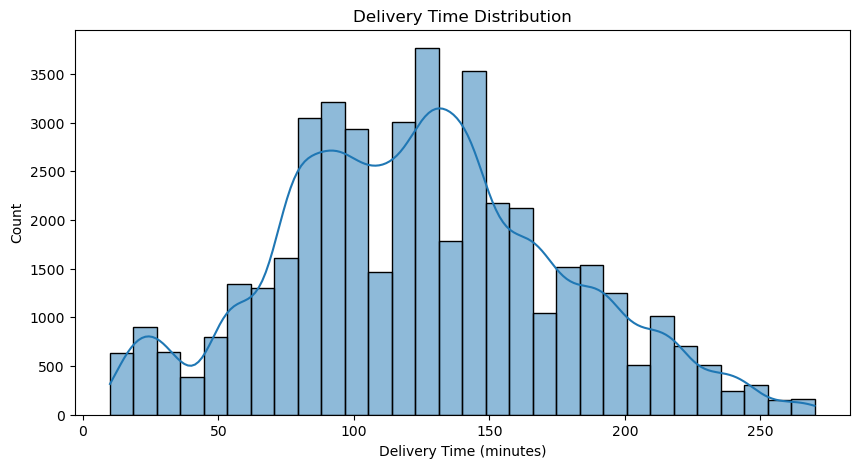


Average Delivery Time by Traffic:
Traffic
Low        101.354557
Medium     126.839669
High       129.424115
Jam        147.758980
Name: Delivery_Time, dtype: float64


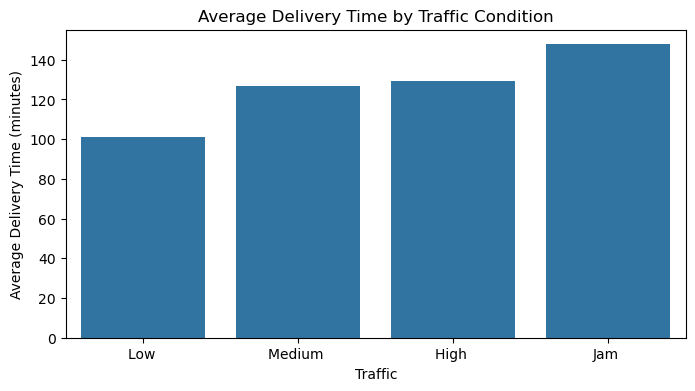


Average Delivery Time by Weather:
Weather
Sunny         103.664453
Stormy        123.211825
Sandstorms    123.238509
Windy         123.658037
Fog           136.570833
Cloudy        138.286773
Name: Delivery_Time, dtype: float64

Delivery Counts by Vehicle:
Vehicle
motorcycle     25519
scooter        14607
van             3522
Name: count, dtype: int64


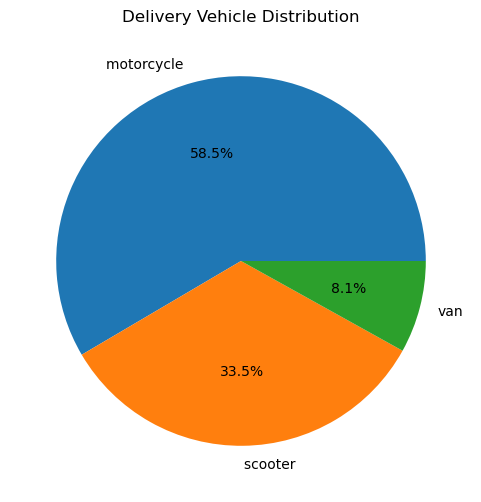

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = '/Users/rakeshpatel/Downloads/delivery_data_cleaned.csv'
df = pd.read_csv(file_path)

# 1. Overall average delivery time
avg_delivery = df['Delivery_Time'].mean()
print(f"Average Delivery Time: {avg_delivery:.2f} minutes")

# 2. Delivery time distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.show()

# 3. Average delivery time by Traffic condition
traffic_avg = df.groupby('Traffic')['Delivery_Time'].mean().sort_values()
print("\nAverage Delivery Time by Traffic:")
print(traffic_avg)

# Barplot for average delivery time by Traffic
plt.figure(figsize=(8,4))
sns.barplot(x=traffic_avg.index, y=traffic_avg.values)
plt.title('Average Delivery Time by Traffic Condition')
plt.ylabel('Average Delivery Time (minutes)')
plt.show()

# 4. Average delivery time by Weather
weather_avg = df.groupby('Weather')['Delivery_Time'].mean().sort_values()
print("\nAverage Delivery Time by Weather:")
print(weather_avg)

# 5. Count of deliveries by Vehicle type
vehicle_counts = df['Vehicle'].value_counts()
print("\nDelivery Counts by Vehicle:")
print(vehicle_counts)

# Optional: Pie chart for vehicle distribution
plt.figure(figsize=(6,6))
vehicle_counts.plot.pie(autopct='%1.1f%%')
plt.title('Delivery Vehicle Distribution')
plt.ylabel('')
plt.show()


Traffic conditions matter a lot

Low traffic deliveries average ~101 min

Jam conditions push it to ~148 min
That’s nearly 50% slower when stuck in traffic.

Weather impact is significant

Sunny days are the fastest (~104 min)

Cloudy and Fog conditions slow things down (~136–138 min)
This hints at operational planning challenges in bad weather.

Vehicle usage distribution

Motorcycles handle ~58% of deliveries

Scooters ~33%, Vans ~9%
This is useful if you want to later analyze speed per vehicle type.


--- Summary of Key Metrics ---
        Distance_km  Order_to_Pickup_min  Delivery_Time  Speed_km_per_min  \
count  43648.000000         43648.000000   43648.000000      43648.000000   
mean      27.255432           -17.325422     124.914475          0.286100   
std      303.815765           196.243803      51.933163          4.057013   
min        1.465067         -1435.000000      10.000000          0.005653   
25%        4.663432             5.000000      90.000000          0.044139   
50%        9.220419            10.000000     125.000000          0.072445   
75%       13.682165            15.000000     160.000000          0.113942   
max     6884.726399            15.000000     270.000000        375.245853   

       Minutes_per_km  
count    43648.000000  
mean        19.951492  
std         19.316962  
min          0.002665  
25%          8.776358  
50%         13.803652  
75%         22.655721  
max        176.885700  


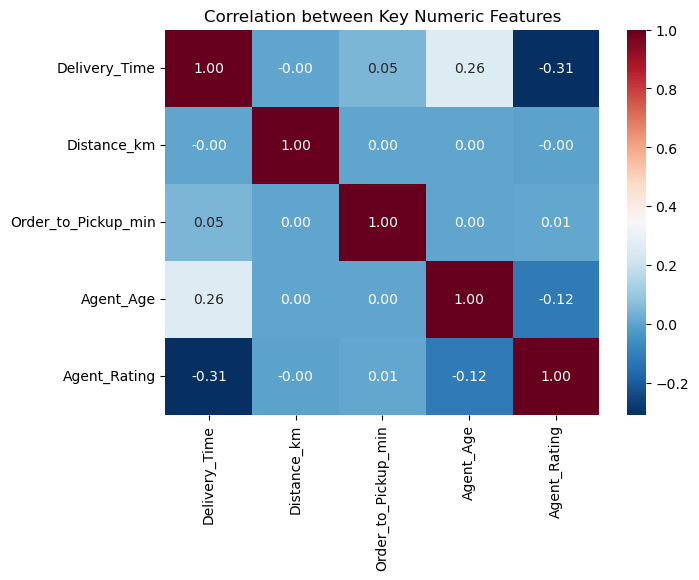

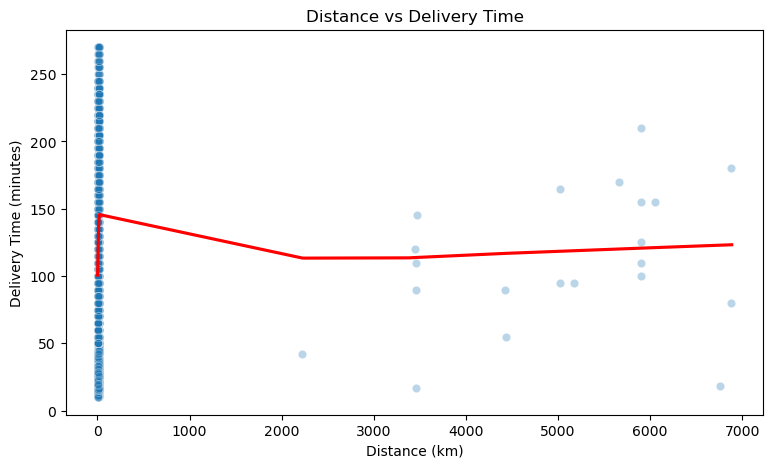

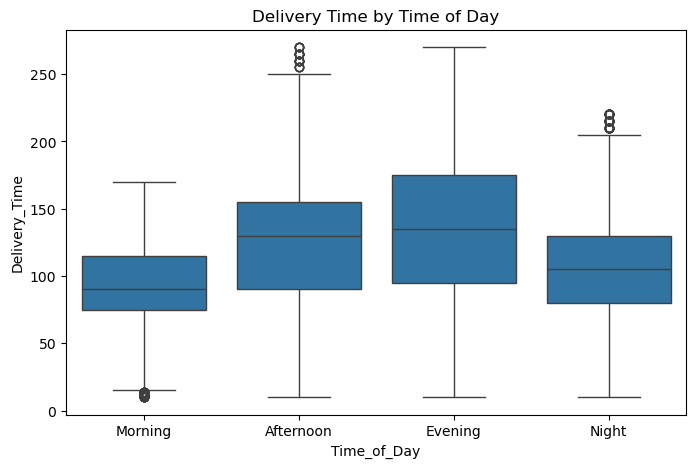


Average delivery time by Time of Day:
Time_of_Day
Afternoon    123.161064
Evening      135.367274
Morning       92.855870
Night        106.967120
Name: Delivery_Time, dtype: float64

Average delivery time by Vehicle:
Vehicle
motorcycle     131.025667
scooter        116.346341
van            116.170358
Name: Delivery_Time, dtype: float64

Average delivery time by Traffic:
Traffic
High       129.424115
Jam        147.758980
Low        101.354557
Medium     126.839669
Name: Delivery_Time, dtype: float64

Average delivery time by Weather:
Weather
Cloudy        138.286773
Fog           136.570833
Sandstorms    123.238509
Stormy        123.211825
Sunny         103.664453
Windy         123.658037
Name: Delivery_Time, dtype: float64

Top 10 slowest deliveries:
            Order_ID  Delivery_Time  Distance_km  Order_to_Pickup_min Traffic  \
18414  oalh813034764            270    16.368575                  5.0    Jam    
4448   tpjd866478251            270    16.852573                 10.0    J

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA

file_path = '/Users/rakeshpatel/Downloads/delivery_data_cleaned.csv'
df = pd.read_csv(file_path, parse_dates=['Order_DateTime', 'Pickup_DateTime'])

# 2. CALCULATE DISTANCE (Haversine formula)

def haversine(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c  # Earth radius in km

df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])


# 3. ORDER → PICKUP TIME (minutes)

df['Order_to_Pickup_min'] = (df['Pickup_DateTime'] - df['Order_DateTime']).dt.total_seconds() / 60


# 4. TIME OF DAY CATEGORY

df['Order_Hour'] = df['Order_DateTime'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 23:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Order_Hour'].apply(get_time_of_day)


# 5. DELIVERY SPEED

df['Delivery_Time'] = pd.to_numeric(df['Delivery_Time'], errors='coerce')
df['Distance_km_nonzero'] = df['Distance_km'].replace(0, np.nan)
df['Speed_km_per_min'] = df['Distance_km_nonzero'] / df['Delivery_Time']
df['Minutes_per_km'] = df['Delivery_Time'] / df['Distance_km_nonzero']


# 6. SUMMARY STATISTICS

print("\n--- Summary of Key Metrics ---")
print(df[['Distance_km','Order_to_Pickup_min','Delivery_Time','Speed_km_per_min','Minutes_per_km']].describe())


# 7. CORRELATION HEATMAP

plt.figure(figsize=(7,5))
numeric_cols = ['Delivery_Time','Distance_km','Order_to_Pickup_min','Agent_Age','Agent_Rating']
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='RdBu_r')
plt.title('Correlation between Key Numeric Features')
plt.show()


# 8. DISTANCE vs DELIVERY TIME

plt.figure(figsize=(9,5))
sns.scatterplot(x='Distance_km', y='Delivery_Time', data=df.sample(min(5000, len(df)), random_state=42), alpha=0.3)
sns.regplot(x='Distance_km', y='Delivery_Time', data=df, scatter=False, lowess=True, color='red')
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


# 9. DELIVERY TIME by TIME OF DAY

plt.figure(figsize=(8,5))
sns.boxplot(x='Time_of_Day', y='Delivery_Time', data=df, order=['Morning','Afternoon','Evening','Night'])
plt.title('Delivery Time by Time of Day')
plt.show()

# 10. GROUP ANALYSIS

print("\nAverage delivery time by Time of Day:")
print(df.groupby('Time_of_Day')['Delivery_Time'].mean())

print("\nAverage delivery time by Vehicle:")
print(df.groupby('Vehicle')['Delivery_Time'].mean())

print("\nAverage delivery time by Traffic:")
print(df.groupby('Traffic')['Delivery_Time'].mean())

print("\nAverage delivery time by Weather:")
print(df.groupby('Weather')['Delivery_Time'].mean())


# 11. TOP 10 SLOWEST DELIVERIES

print("\nTop 10 slowest deliveries:")
cols_to_show = ['Order_ID','Delivery_Time','Distance_km','Order_to_Pickup_min','Traffic','Weather','Vehicle','Area']
print(df.sort_values('Delivery_Time', ascending=False).head(10)[cols_to_show])

# 12. SAVE ENRICHED DATA
``
out_path = '/Users/rakeshpatel/Downloads/delivery_data_enriched.csv'
df.to_csv(out_path, index=False)
print(f"\nEnriched dataset saved to: {out_path}")



Delay rate by Traffic:
Traffic
Jam        28.95
Medium     13.46
High       11.03
Low         3.49
Name: Is_Delayed, dtype: float64

Delay rate by Weather:
Weather
Fog           24.60
Cloudy        24.53
Stormy        10.84
Windy         10.74
Sandstorms    10.63
Sunny          6.19
Name: Is_Delayed, dtype: float64

Delay rate by Time_of_Day:
Time_of_Day
Evening      20.79
Afternoon     8.36
Night         5.74
Morning       0.00
Name: Is_Delayed, dtype: float64

Delay rate by Vehicle:
Vehicle
motorcycle     17.90
scooter        10.17
van             9.88
Name: Is_Delayed, dtype: float64

Delay rate by Distance Category:
Distance_Category
10-20km    26.79
5-10km      5.50
2-5km       3.45
0-2km       2.85
Name: Is_Delayed, dtype: float64

Delay rate by Pickup Delay Category:
Pickup_Delay_Category
0-10min      15.00
10-30min     14.47
30-60min       NaN
60-120min      NaN
Name: Is_Delayed, dtype: float64


/var/folders/ct/srsw4zk13g5gnw9_lhn7pl740000gn/T/ipykernel_8411/506532844.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(column)['Is_Delayed']
/var/folders/ct/srsw4zk13g5gnw9_lhn7pl740000gn/T/ipykernel_8411/506532844.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(column)['Is_Delayed']
/var/folders/ct/srsw4zk13g5gnw9_lhn7pl740000gn/T/ipykernel_8411/506532844.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

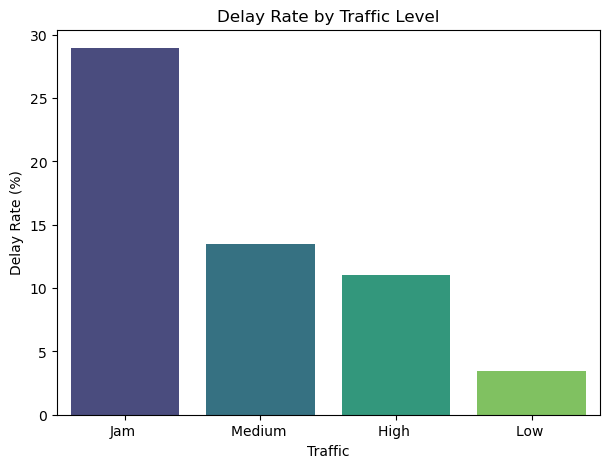

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create delay flag
df['Is_Delayed'] = df['Delivery_Time'] > 180  # threshold in minutes

# Step 2: Function to get delay rate per category
def delay_rate_by(column):
    return (df.groupby(column)['Is_Delayed']
              .mean()
              .sort_values(ascending=False) * 100).round(2)

# Step 3: Delay rate analysis
factors = ['Traffic', 'Weather', 'Time_of_Day', 'Vehicle']
for factor in factors:
    print(f"\nDelay rate by {factor}:")
    print(delay_rate_by(factor))

# Step 4: Distance-based delay rate
df['Distance_km'] = (( (df['Store_Latitude'] - df['Drop_Latitude'])**2 +
                       (df['Store_Longitude'] - df['Drop_Longitude'])**2 )**0.5) * 111
df['Distance_Category'] = pd.cut(df['Distance_km'], bins=[0, 2, 5, 10, 20], labels=['0-2km', '2-5km', '5-10km', '10-20km'])

print("\nDelay rate by Distance Category:")
print(delay_rate_by('Distance_Category'))

# Step 5: Pickup delay range
df['Order_Pickup_Delay'] = (pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S') -
                            pd.to_datetime(df['Order_Time'], format='%H:%M:%S')).dt.total_seconds() / 60
df['Pickup_Delay_Category'] = pd.cut(df['Order_Pickup_Delay'], bins=[0, 10, 30, 60, 120], labels=['0-10min', '10-30min', '30-60min', '60-120min'])

print("\nDelay rate by Pickup Delay Category:")
print(delay_rate_by('Pickup_Delay_Category'))

# Step 6: Example visualization - Traffic
plt.figure(figsize=(7,5))
sns.barplot(x=delay_rate_by('Traffic').index, y=delay_rate_by('Traffic').values, palette="viridis")
plt.ylabel("Delay Rate (%)")
plt.title("Delay Rate by Traffic Level")
plt.show()


/var/folders/ct/srsw4zk13g5gnw9_lhn7pl740000gn/T/ipykernel_8411/3987474739.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = (df.groupby(column)['Is_Delayed']
/var/folders/ct/srsw4zk13g5gnw9_lhn7pl740000gn/T/ipykernel_8411/3987474739.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = (df.groupby(column)['Is_Delayed']


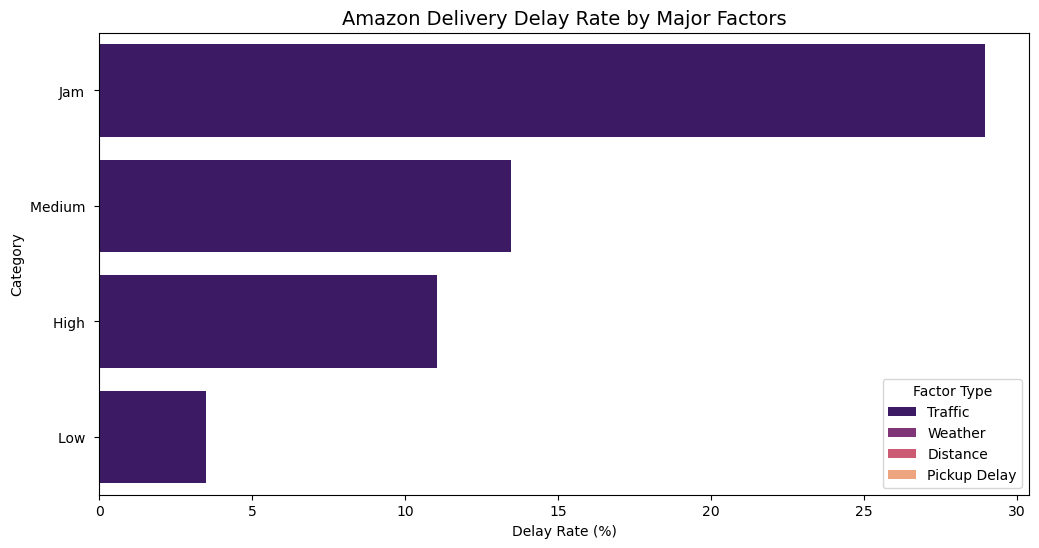


Summary Table - Delay Rates:
   Traffic Level  Delay Rate (%)        Factor Weather Condition  \
0           Jam            28.95       Traffic               NaN   
10           NaN           26.79      Distance               NaN   
4            NaN           24.60       Weather               Fog   
5            NaN           24.53       Weather            Cloudy   
14           NaN           15.00  Pickup Delay               NaN   
15           NaN           14.47  Pickup Delay               NaN   
1        Medium            13.46       Traffic               NaN   
2          High            11.03       Traffic               NaN   
6            NaN           10.84       Weather            Stormy   
7            NaN           10.74       Weather             Windy   
8            NaN           10.63       Weather        Sandstorms   
9            NaN            6.19       Weather             Sunny   
11           NaN            5.50      Distance               NaN   
3           Low   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate delay rates for a given factor
def delay_rate_df(column, label_name):
    rates = (df.groupby(column)['Is_Delayed']
               .mean()
               .sort_values(ascending=False) * 100).round(2)
    return pd.DataFrame({label_name: rates.index, 'Delay Rate (%)': rates.values})

# Prepare all factor delay rate tables
traffic_df = delay_rate_df('Traffic', 'Traffic Level')
traffic_df['Factor'] = 'Traffic'

weather_df = delay_rate_df('Weather', 'Weather Condition')
weather_df['Factor'] = 'Weather'

distance_df = delay_rate_df('Distance_Category', 'Distance Range')
distance_df['Factor'] = 'Distance'

pickup_df = delay_rate_df('Pickup_Delay_Category', 'Pickup Delay Range')
pickup_df['Factor'] = 'Pickup Delay'

# Combine all into one table
all_factors_df = pd.concat([traffic_df, weather_df, distance_df, pickup_df], ignore_index=True)

# Chart: Delay Rate by Factor
plt.figure(figsize=(12,6))
sns.barplot(data=all_factors_df, x='Delay Rate (%)', y=all_factors_df.columns[0], hue='Factor', palette='magma')
plt.title("Amazon Delivery Delay Rate by Major Factors", fontsize=14)
plt.xlabel("Delay Rate (%)")
plt.ylabel("Category")
plt.legend(title="Factor Type")
plt.show()

# Display summary table
print("\nSummary Table - Delay Rates:")
print(all_factors_df.sort_values(by='Delay Rate (%)', ascending=False))
# Next time you need it
df = pd.read_csv("amazon_delivery_cleaned.csv")



In [4]:
import os

df.to_csv("amazon_delivery_cleaned.csv", index=False)  # no extra index column
print(f"✅ File saved at: {os.path.abspath('amazon_delivery_cleaned.csv')}")

✅ File saved at: /Users/rakeshpatel/Downloads/Data Analytics Project/amazon_delivery_cleaned.csv
